In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [2]:
data = pd.read_csv('Sales_add.csv')

In [31]:
data.head(22)

Month      Region      Manager  Sales_before_digital_add(in $)  \
0    Month-1  Region - A  Manager - A                          132921   
1    Month-2  Region - A  Manager - C                          149559   
2    Month-3  Region - B  Manager - A                          146278   
3    Month-4  Region - B  Manager - B                          152167   
4    Month-5  Region - C  Manager - B                          159525   
5    Month-6  Region - A  Manager - B                          137163   
6    Month-7  Region - C  Manager - C                          130625   
7    Month-8  Region - A  Manager - A                          131140   
8    Month-9  Region - B  Manager - C                          171259   
9   Month-10  Region - C  Manager - B                          141956   
10  Month-11  Region - B  Manager - C                          159339   
11  Month-12  Region - A  Manager - A                          178939   
12  Month-13  Region - B  Manager - A                          145062   
13  Month-14  Region - A  Manager - A                          151514   
14  Month-15  Region - C  Manager - A                          147463   
15  Month-16  Region - A  Manager - B                          177195   
16  Month-17  Region - A  Manager - C                          140862   
17  Month-18  Region - C  Manager - B                          167996   
18  Month-19  Region - B  Manager - A                          132135   
19  Month-20  Region - A  Manager - B                          152493   
20  Month-21  Region - B  Manager - A                          147425   
21  Month-22  Region - A  Manager - C                          130263   

    Sales_After_digital_add(in $)  
0                          270390  
1                          223334  
2                          244243  
3                          231808  
4                          258402  
5                          256948  
6                          222106  
7                          230637  
8                          226261  
9                          193735  
10                         203175  
11                         276279  
12                         205180  
13                         253131  
14                         229336  
15                         187305  
16                         234908  
17                         191517  
18                         227040  
19                         212579  
20                         263388  
21                         243020

In [9]:
data.shape

(22, 5)

In [10]:
data.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [13]:
data.describe()

Sales_before_digital_add(in $)  Sales_After_digital_add(in $)
count                       22.000000                      22.000000
mean                    149239.954545                  231123.727273
std                      14844.042921                   25556.777061
min                     130263.000000                  187305.000000
25%                     138087.750000                  214960.750000
50%                     147444.000000                  229986.500000
75%                     157627.500000                  250909.000000
max                     178939.000000                  276279.000000

# Question 1 

In [14]:
# H0: Sales after digital Marketing > Sales before digital marketing
# H1: Sales after digital mARKETING <=Sales before digital Marketing

C:\Users\Dhanesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_before_digital_add(in $)', ylabel='Density'>

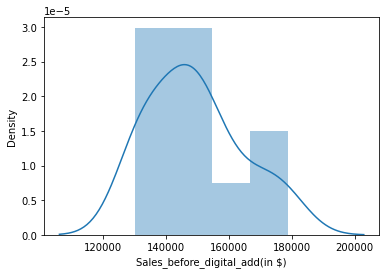

In [26]:
sns.distplot(data["Sales_before_digital_add(in $)"])

C:\Users\Dhanesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_After_digital_add(in $)', ylabel='Density'>

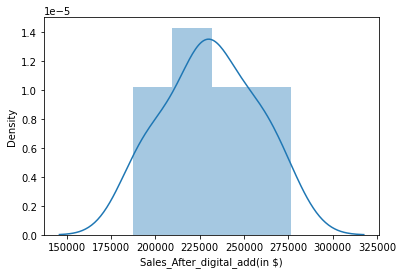

In [27]:
sns.distplot(data["Sales_After_digital_add(in $)"])

In [29]:
stat.ttest_rel(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'],axis=0,alternative='two-sided')

Ttest_relResult(statistic=-12.09070525287017, pvalue=6.336667004575778e-11)

In [30]:
# since p value > 0.1, we cannot reject the null hypothesis. Sales after digital Marketing > Sales before digital marketing
# There is significant increase in sales after the company stepped into digital marketing

# Question 2

In [40]:
# H0 : There is no significant relationship between 'Region' and 'Manager' 
# H1 : There is significant relationship between 'Region' and 'Manager'

In [41]:
crosstab = pd.crosstab(data["Region"], data["Manager"], margins=True)

In [43]:
crosstab

Manager     Manager - A  Manager - B  Manager - C  All
Region                                                
Region - A            4            3            3   10
Region - B            4            1            2    7
Region - C            1            3            1    5
All                   9            7            6   22

In [36]:
stat.chi2_contingency(crosstab)

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

In [44]:
# X^2 = 3.050566893424036 , p value = 0.5493991051158094, dof = 4
# p value > .5, there is a significant relationship between the 'Region' and 'Manager'